In [ ]:
"""
Cart Pole:
Observation:
0: Cart Position [-4.8, 4.8], with episode ending at [-2.4, 2.4]
1: Cart Velocity [-Inf, Inf]
2: Pole Angle [-0.418, 0.418] (in radians) with episode ending at [-0.2095, 0.2095]
3: Pole Angular Velocity [-Inf, Inf]

Env.Reset():
returns tuple:
0: observation
1: info

Env.Step():
returns tuple:
0: observation
1: reward
2: done
3: truncated
4: info

Notes:

- optimistic initialization helped explore the unseen actions
- with optmistic intialization, both reward functions performed similarly
- e-soft:
    - with 10000 steps, and epsilon 0.01 performs worse than optimistic initialization
        - no obvious differnce between epsilon soft with custom reward function (50-50 cart position : pole angle)
    - 6,000 steps, 5 trials averaged, 0.04 epsilon:
        - still performs worse than optimistic initially
        - custom reward function (80% pole angle - 20% cart position) may be overtaking default reward function it around 6000 steps?
    - 10,000 steps, 2 trials averaged, 0.04 epsilon
        - custom reword (80:20) results in much longer episode lengths        
- every visit vs first visit has no distiguishable differece in performance both in returns and 
- off policy MC-control - every visit 10000 episodes averaged over 2 runs
    - compared with on policy, they both obviously take time to learn but
    - assuming my implementation is right, off policy performs much worse for the same number of iterations. 
      this could be because it descards much more of each episode
    - it does run almost twice as quickly though



TODO: 
 - compare off policy with more episodes 
"""

In [1]:
from discretize import discretize
from collections import defaultdict
from monte_carlo import *
from q_io import *
from tqdm import trange
from td_methods import *
import gymnasium as gym
from plots import *

In [2]:
epsilon = 0.04
num_episodes = 5000
gamma = 0.95
num_to_avg = 2
env = gym.make('CartPole-v1')

In [ ]:
all_Qs = []
all_policies = []
all_returns = []
all_episode_lengths = []

for i in range(num_to_avg):
    Q, policy, returns, episode_lengths = off_policy_mc_control(
        env,
        num_episodes,
        gamma,
        epsilon,
        episode_generator_func=generate_episode_reward_central_vertical,
    )
    all_Qs.append(Q)
    all_policies.append(policy)
    all_returns.append(returns)
    all_episode_lengths.append(episode_lengths)

avg_returns_off_policy = np.average(all_returns, axis=0)
avg_episode_lengths_off_policy = np.average(
    all_episode_lengths, axis=0
)

In [ ]:
off_policy_episode_lengths = []

for i in trange(num_episodes):
    off_policy_episode_lengths.append(len(generate_episode(env, policy)))

In [3]:
all_Qs = []
all_policies = []
all_returns = []
all_episode_lengths = []

for i in range(num_to_avg):
    Q, policy, returns, episode_lengths = on_policy_mc_control_epsilon_soft(
        env,
        num_episodes,
        gamma,
        epsilon,
        episode_generator_func=generate_episode_reward_central_vertical,
    )
    all_Qs.append(Q)
    all_policies.append(policy)
    all_returns.append(returns)
    all_episode_lengths.append(episode_lengths)

avg_returns_e_soft_custom_reward = np.average(all_returns, axis=0)
avg_episode_lengths_e_soft_custom_reward = np.average(all_episode_lengths, axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


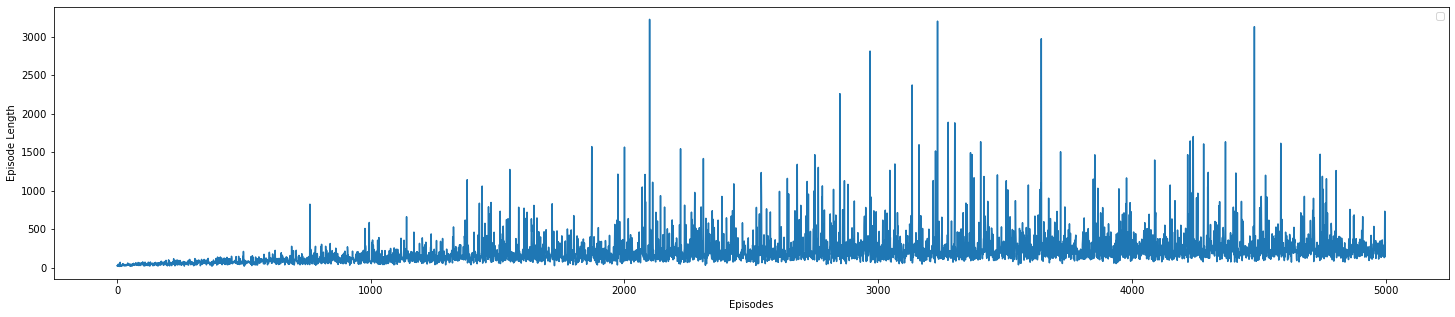

In [4]:
plot_single_iteration_returns(avg_episode_lengths_e_soft_custom_reward, y_label="Episode Length")

In [ ]:
# save_array(avg_returns_e_soft, "testing/10000_eps_95gamma_04epsilon/e_soft_returns_default.csv")
# save_array(avg_episode_lengths_e_soft, "testing/10000_eps_95gamma_04epsilon/e_soft_episode_lengths_default.csv")
# save_array(avg_returns_optimistic, "testing/6000_ep_95gamma_0.04epsilon/optimistic_returns_default.csv")
# save_array(avg_episode_lengths_optimistic, "testing/6000_ep_95gamma_0.04epsilon/optimistic_episode_lengths_default.csv")
# save_array(avg_returns_e_soft_custom_reward, "testing/10000_eps_95gamma_04epsilon/e_soft_returns_custom_reward.csv")
# save_array(avg_episode_lengths_e_soft_custom_reward, "testing/10000_eps_95gamma_04epsilon/e_soft_episode_lengths_custom_reward.csv")


# avg_returns_e_soft = load_array("testing/e_soft_returns_default.csv")
# avg_episode_lengths_e_soft = load_array("testing/e_soft_episode_lengths_default.csv")
# avg_returns_optimistic = load_array("testing/10000_eps_99gamma_0.01epsilon_10_averaged/optimistic_returns_default.csv")
# avg_episode_lengths_optimistic = load_array("testing/10000_eps_99gamma_0.01epsilon_10_averaged/optimistic_episode_lengths_default.csv")
# avg_returns_e_soft_custom_reward = load_array("testing/e_soft_returns_custom_reward.csv")
# avg_episode_lengths_e_soft_custom_reward = load_array("testing/e_soft_episode_lengths_custom_reward.csv")

In [ ]:
k = 1

# plot_returns_different_agents(
#     [
#         avg_episode_lengths_e_soft_custom_reward[::k],
#         avg_episode_lengths_e_soft_custom_reward_every_visit[::k],
#     ],
#     ["first visit", "every visit"],
# )


list_1 = []
list_2 = []
step_size = 50
sum_1 = 0
sum_2 = 0
for i in range(10000):
    if i % step_size == 0:
        list_1.append(sum_1 / step_size)
        list_2.append(sum_2 / step_size)
        sum_1 = 0
        sum_2 = 0
    # sum_1 += avg_episode_lengths_e_soft_custom_reward[i]
    sum_1 += avg_episode_lengths_off_policy[i]
    sum_2 += off_policy_episode_lengths[i]


plot_returns_different_agents(
    [list_1[1:], list_2[1:]], ["e-soft custom reward", "off policy"]
)

In [ ]:
env = gym.make('CartPole-v1', render_mode='human')
# Q = load_q_values("optimistic_initialization/large_negative_reward/q/5000_episodes_95_gamma_0.csv")
run_iterations(env, Q, 10)

In [ ]:
# # load values
# returns_neg_reward = [[] for i in range(5)]
# episode_lengths_neg_reward = [[] for i in range(5)]
# returns_reg_reward = [[] for i in range(5)]
# episode_lengths_reg_reward = [[] for i in range(5)]

# for i in range(5):
#     returns_neg_reward[i] = load_array(f"optimistic_initialization/large_negative_reward/returns/5000_episodes_95_gamma_{i}.csv")
#     episode_lengths_neg_reward[i] = load_array(f"optimistic_initialization/large_negative_reward/episode_length/5000_episodes_95_gamma_{i}.csv")
#     returns_reg_reward[i] = load_array(f"optimistic_initialization/regular_reward/returns/5000_episodes_95_gamma_{i}.csv")
#     episode_lengths_reg_reward[i] = load_array(f"optimistic_initialization/regular_reward/episode_length/5000_episodes_95_gamma_{i}.csv")


In [ ]:
plot_returns([returns_neg_reward], ['negative reward'])

In [ ]:
plot_returns([returns_reg_reward], ['regular reward'])


In [ ]:
plot_single_iteration_returns(np.log10(np.average(episode_lengths_reg_reward, axis=0)))

In [ ]:
plot_single_iteration_returns(np.log10(np.average(episode_lengths_neg_reward, axis=0)))